# Computer Vision - TP1

## Parte 1

* Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [3]:
path_white_patch = r"C:\Users\zerba\Documents\UBA\Repos\Repositorios de Eloy\UBA-CV1\TP1\Material_TPs\TP1\white_patch"
path_coordenadas_cromaticas = r"C:\Users\zerba\Documents\UBA\Repos\Repositorios de Eloy\UBA-CV1\TP1\Material_TPs\TP1\coord_cromaticas"

In [4]:
imgs_paths = os.listdir(path_coordenadas_cromaticas)
imgs_paths

['CoordCrom_1.png', 'CoordCrom_2.png', 'CoordCrom_3.png']

C:\Users\zerba\AppData\Local\Temp\ipykernel_14804\529347822.py:5: RuntimeWarning: invalid value encountered in divide
  img_corr = np.where(den ==0,0,img/den)


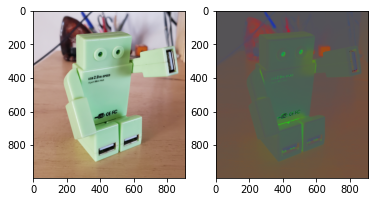

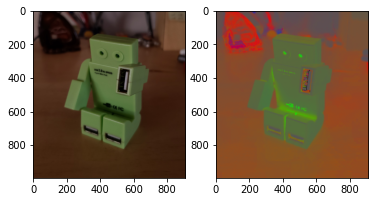

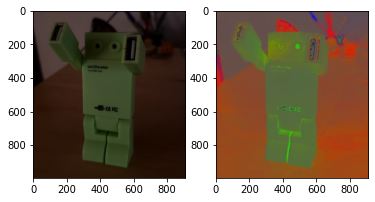

In [5]:
for img_path in imgs_paths:
    img = cv2.imread(os.path.join(path_coordenadas_cromaticas,img_path))[:,:,::-1] # Formato RGB
    den = np.sum(img,axis = 2)
    den = den[:,:,np.newaxis]
    img_corr = np.where(den ==0,0,img/den)
    plt.figure()
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(img_corr)

Algoritmo white-patch

In [6]:
def white_patch(img):
    img = np.array(img, float)
    r_max = np.max(img[:,:,0])
    g_max = np.max(img[:,:,1])
    b_max = np.max(img[:,:,2])

    output = np.empty_like(img)
    output[:,:,0] = img[:,:,0]*255/r_max
    output[:,:,1] = img[:,:,1]*255/g_max
    output[:,:,2] = img[:,:,2]*255/b_max

    output = np.array(output, np.uint8)

    return output

['test_blue.png', 'test_green.png', 'test_red.png', 'wp_blue.jpg', 'wp_green.png', 'wp_green3.jpg', 'wp_no_white.png', 'wp_red.png', 'wp_red2.jpg']


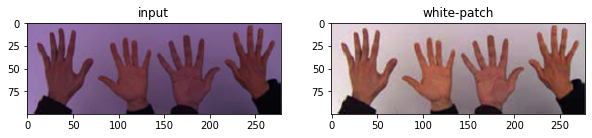

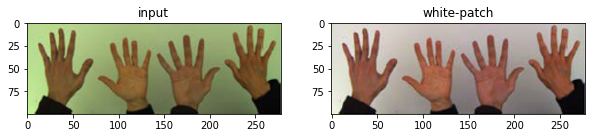

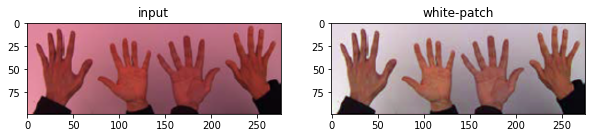

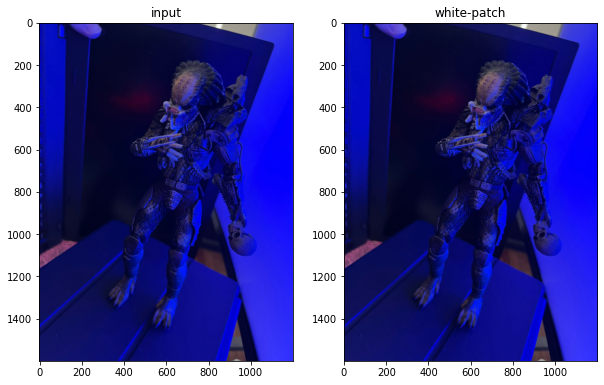

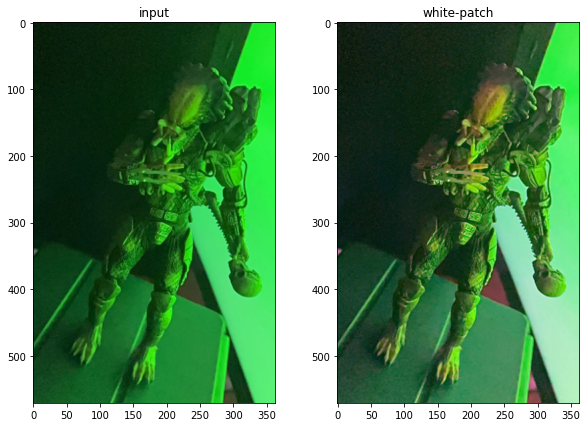

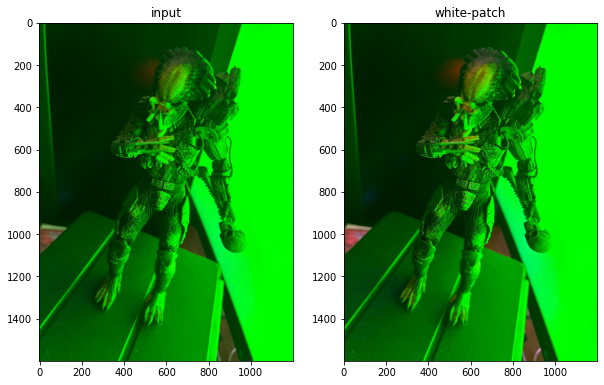

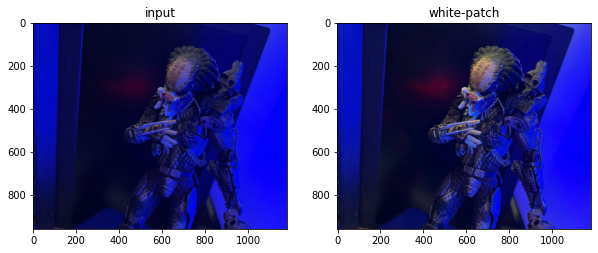

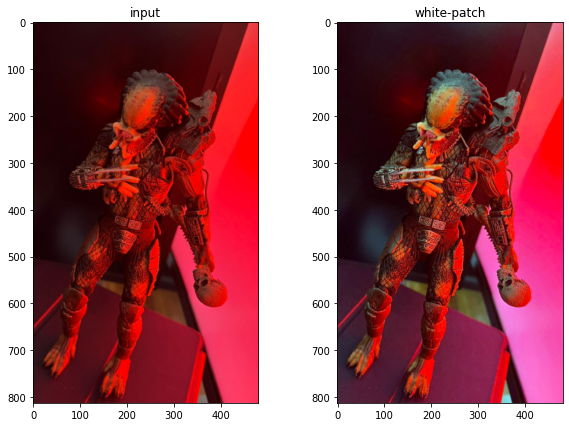

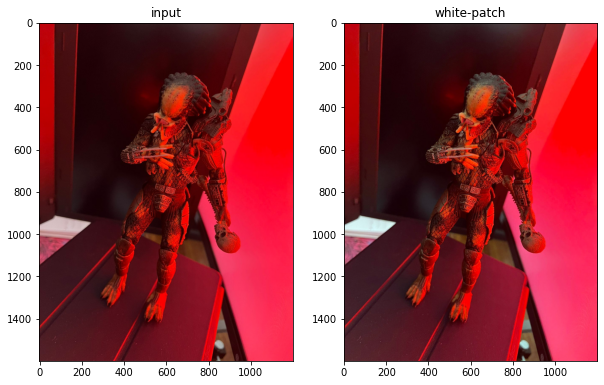

In [7]:
imgs_paths = os.listdir(path_white_patch)
print(imgs_paths)
for img_path in imgs_paths:
    img = cv2.imread(os.path.join(path_white_patch,img_path))[:,:,::-1] # Formato RGB
    plt.figure(figsize = (10,7))
    plt.subplot(121)
    plt.title('input')
    plt.imshow(img)
    plt.subplot(122)
    plt.title('white-patch')
    plt.imshow(white_patch(img))

Cuando se utiliza el algoritmo de whte-patch, se mapea la imagen original a nuevas componenetes que estan afectadas por un factor de escala que depende del valor máximo existente en cada uno de los canales. Cuano hay presencia de al menos un pixel blanco, el valor maximo encontrado en los trs canales es 255, lo que hace que el factor de escala para las nuevas componentes sea 1, es decir, las componentes de la imagen no son afectadas.

## Parte 2

(288, 287)
(288, 287)


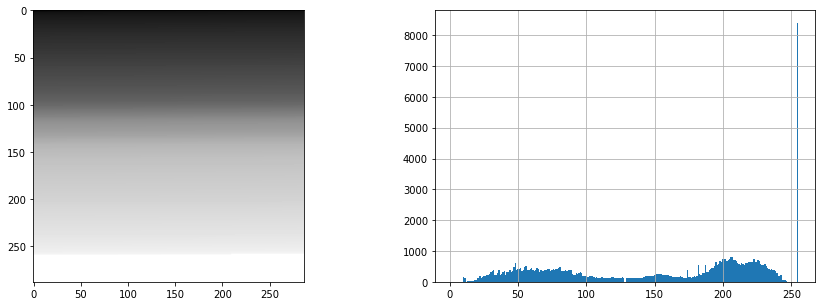

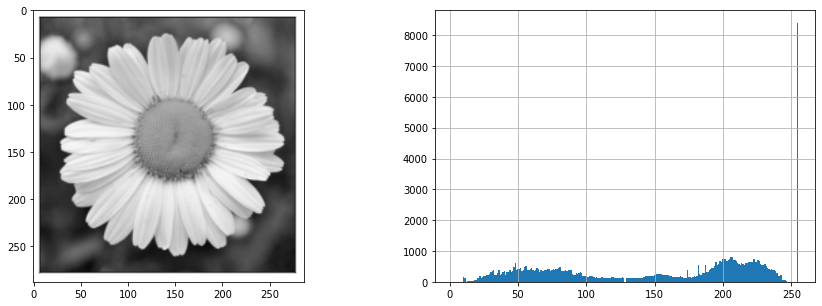

In [8]:
img_1 = cv2.imread(r"C:\Users\zerba\Documents\UBA\Repos\Repositorios de Eloy\UBA-CV1\TP1\Material_TPs\TP1\img1_tp.png", cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread(r"C:\Users\zerba\Documents\UBA\Repos\Repositorios de Eloy\UBA-CV1\TP1\Material_TPs\TP1\img2_tp.png", cv2.IMREAD_GRAYSCALE)

print(img_1.shape)
print(img_2.shape)

# las imagenes estan en escala de grises

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.imshow(img_1, cmap = 'gray')
plt.subplot(122)
plt.hist(img_1.flatten(), bins=255);
plt.grid('on')

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.imshow(img_2, cmap = 'gray')
plt.subplot(122)
plt.hist(img_2.flatten(), bins=255);
plt.grid('on')

LAs dos imagenes estudiadas presentan el mismo histograma, es decir, tinen el mismo contenido en términos de cantidad y valores de pixel, solo que la diferencia entre ellas es la forma en que estos pixeles se distribuyen en el espacio de la imagen.

Para el caso del entrenamiento de un modelo, tomar el histograma como features "enmascara" mucha informacion que hacen diferente a una imagen de otra. Para un problema de detecction , no veo que sea una buena desicion tomar el histograma como features.

Para el problema de clasificación, sería válido tomar el histograma como feature si éste refleja caracteristicas que representan a cada una de las clases a detectar, de otro caso, tampoco sería una buena elección. 

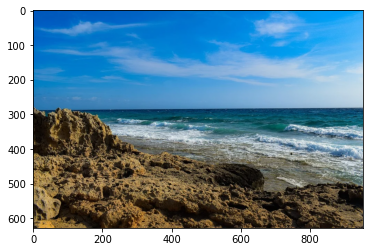

In [9]:
img_seg = cv2.imread(r"C:\Users\zerba\Documents\UBA\Repos\Repositorios de Eloy\UBA-CV1\TP1\Material_TPs\TP1\segmentacion.png")[:,:,::-1] # Formato RGB
plt.figure()
plt.imshow(img_seg)

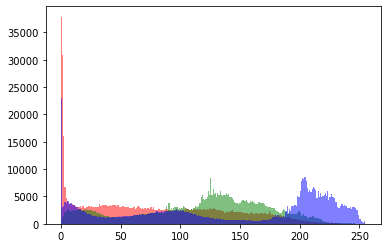

In [10]:

plt.figure()
plt.hist(img_seg[:,:,0].flatten(), bins = 255, color= 'r', alpha = 0.5);
plt.hist(img_seg[:,:,1].flatten(), bins = 255, color= 'g', alpha = 0.5);
plt.hist(img_seg[:,:,2].flatten(), bins = 255, color= 'b', alpha = 0.5);

Text(0.5, 1.0, 'Cielo... y mar')

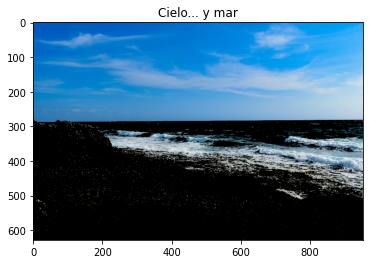

In [80]:

channel_0 = img_seg[:,:,0]
channel_1 = img_seg[:,:,1]
channel_2 = img_seg[:,:,2]

_,mask2 = cv2.threshold(channel_2,130, 255,cv2.THRESH_BINARY) 
mask2 = mask2[...,np.newaxis]
masked_img = np.where(mask2 == 0,np.zeros_like(mask2),img_seg)
plt.figure()
plt.imshow(masked_img)
plt.title('Cielo... y mar')

